***
# Lab 1 - Computer Arithmetic and Bisection Method
## January 16 - January 20, 2023
## Student 1 Name: Dhruv Shah,  Student 1 ID No. 202103017
## Student 2 Name: Vatsal Shah,  Student 2 ID No. 202103022
## Student 3 Name: Pranav Patel,  Student 3 ID No. 202103040
## Date of Submission: $\underline{25/01/23}$
***

In [2]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 One particular measure of accuracy of a computer number representation is called the Machine epsilon. If C is the set of all machine numbers, machine epsilon $\epsilon$ is defined as $\epsilon = \min \{ x ∈ C | ( 1 + x ) − 1 > 0 \}$

### Q.1 (a) Write a function `mymacheps` that computes and prints the machine epsilon as per the above definition.
### Q.1 (b) In the definition above, if we replace the integer 1 by any other integer, say $n$, i.e., $\epsilon = \min \{ x ∈ C | ( n + x ) − n > 0 \}$ will the value of $\epsilon$ change? Justify your answer with a few examples.

In [46]:
# Function mymacheps for Q.1 (a) and (b)
def mymacheps(x):
    eps = 2
#     print(eps)
    itr = 0
    while (x+eps > x):
        eps = eps/2
        itr = itr + 1
        # print(eps)
#         eps = (1+eps) - 1
    print("The value of machine epsilon is", 2*eps, "for x = ", x)
    print("The number of iterations is ", itr-1 , "for x = " , x)

In [49]:
# Q.1(a) - Run with n = 1


mymacheps(1)
# Q.1(b) - Run with different values of n, both smaller than 1 and larger than 1
mymacheps(10)
mymacheps(100)
# mymacheps(10e10)
# mymacheps(-1)
# mymacheps(-2)
# mymacheps(-10)



The value of machine epsilon is 2.220446049250313e-16 for x =  1
The number of iterations is  53 for x =  1
The value of machine epsilon is 1.7763568394002505e-15 for x =  10
The number of iterations is  50 for x =  10
The value of machine epsilon is 1.4210854715202004e-14 for x =  100
The number of iterations is  47 for x =  100


## <font color='white'> Ans 1: Write your observations and comments here <font>
Here we get the value of $\epsilon$ different at different values of n.

We observe that the number of iterations to get to the $\epsilon$ decreases as we increase the value of $|n|$. Also for different values of $n$, we get different values of $\epsilon$. This is because the value of $\epsilon$ is dependent on the value of $n$, as floating point representation of any number can be written as $n(1+\epsilon)$. This means that the value of $\epsilon$ is dependent on the value of $n$. Hence, the value of $\epsilon$ changes as we change the value of $n$.

***
### Q.2 A well know result from trigonometry is $\sin x = \pm \sqrt{1 − \cos^2 x}$. Using only the function `numpy.cos` , write a function mysin that computes $sin x$ for any input $x$. Do you think this procedure will lead to numerical errors? If yes, why? Can you think of another way to implement this process, given that you must use `numpy.cos` that reduces this error?

In [4]:
# Write functions to obtain approximations to sin x using cos x. If you have more than one way of doing so, 
# use mysin1(x) and mysin2(x) as function names.
def mysin1(x):
    quad = np.zeros(len(x))
    sin = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]>2*np.pi or x[i]<(-2*np.pi):
            quad[i] = math.fmod(x[i],(2*math.pi))
        
        # Divide x by n*pi/2 and take the remainder
        quad[i] = math.fmod(x[i],(math.pi/2))
        quad[i] = math.floor(quad[i])

        
        if quad[i] == 0 or quad[i]==-4: #Finding the appropriate quadrant to evaluate the value of sin(x)
            sin[i] = np.sqrt(1-(np.cos(x[i]))**2)
        elif quad[i] == 1 or quad[i] == -3:
            sin[i] = np.sqrt(1-(np.cos(x[i]))**2)
        elif quad[i] == 3 or quad[i] == -2:
            sin[i] = (-np.sqrt(1-(np.cos(x[i]))**2))
        elif quad[i] == 4 or quad[i] == -1:
            sin[i] = (-np.sqrt(1-(np.cos(x[i]))**2))
    return sin

def mysin2(x):  #Cos(2x) = 1 - 2sin(x)^2
    quad = np.zeros(len(x))
    sin = np.zeros(len(x))
    for i in range(len(x)):
        if (x[i]>(2*np.pi) or x[i]<(-2*np.pi)):
            quad[i] = math.fmod(x[i],(2*math.pi))
        
        # Divide x by n*pi/2 and take the remainder
        quad[i] = math.fmod(x[i],(math.pi/2))
        quad[i] = math.floor(quad[i])

        if (quad[i] == 0 or quad[i]==-4):
            sin[i] = np.sqrt((1-np.cos(2*x[i]))/2)
        elif (quad[i] == 1 or quad[i] == -3):
            sin[i] = np.sqrt((1-np.cos(2*x[i]))/2)
        elif (quad[i] == 3 or quad[i] == -2):
            sin[i] = (-np.sqrt((1-np.cos(2*x[i]))/2))
        elif (quad[i] == 4 or quad[i] == -1):
            sin[i] = (-np.sqrt((1-np.cos(2*x[i]))/2))
    return sin

[0. 1. 0. 1. 0.]
[-1.2246468e-16 -1.0000000e+00  0.0000000e+00  1.0000000e+00
  1.2246468e-16]


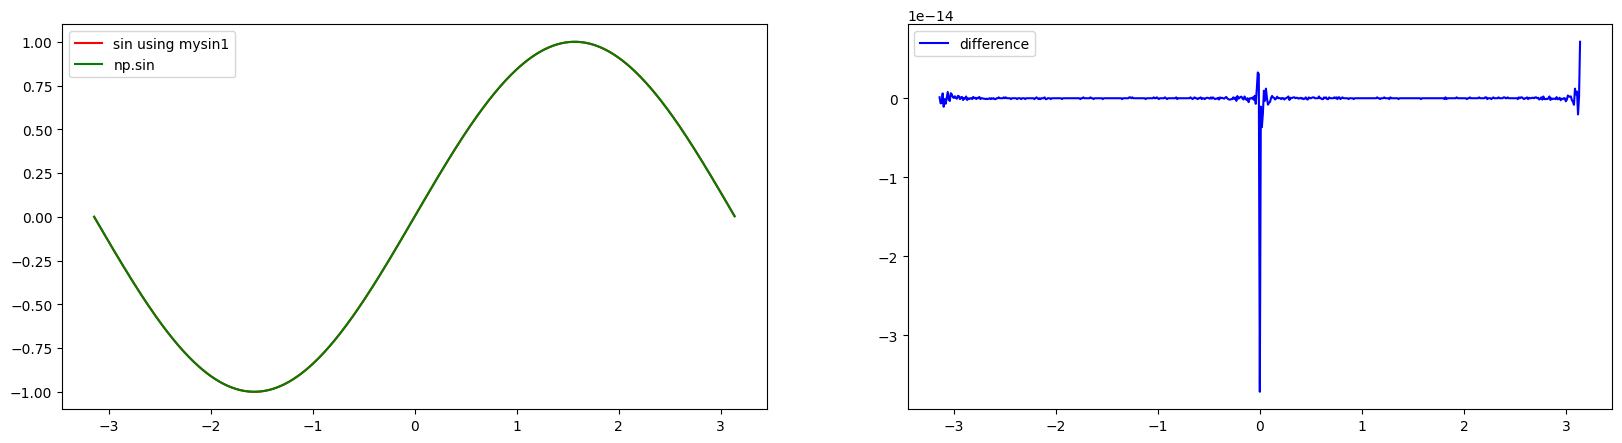

In [5]:
# Implemented mysin1(x) and plotted the result
x = np.arange(-np.pi, np.pi, 0.01)
y = mysin1(x)
y1 = np.sin(x)


d = (y-y1)
# print(np.max(d))
x_test = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi] 
y_test = mysin1(x_test)
y1_test = np.sin(x_test) # Here np.sin(x) calculates incorrect 
d_test = y_test-y1_test
print(y_test)
print(y1_test)

#Plotting the values of y and y1 along with the absolute error.

fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].plot(x, y, color='r', label='sin using mysin1')
ax[0].plot(x, y1, color='g', label='np.sin')
ax[0].legend()

ax[1].plot(x, d, color='b', label='difference')
ax[1].legend()

plt.show()

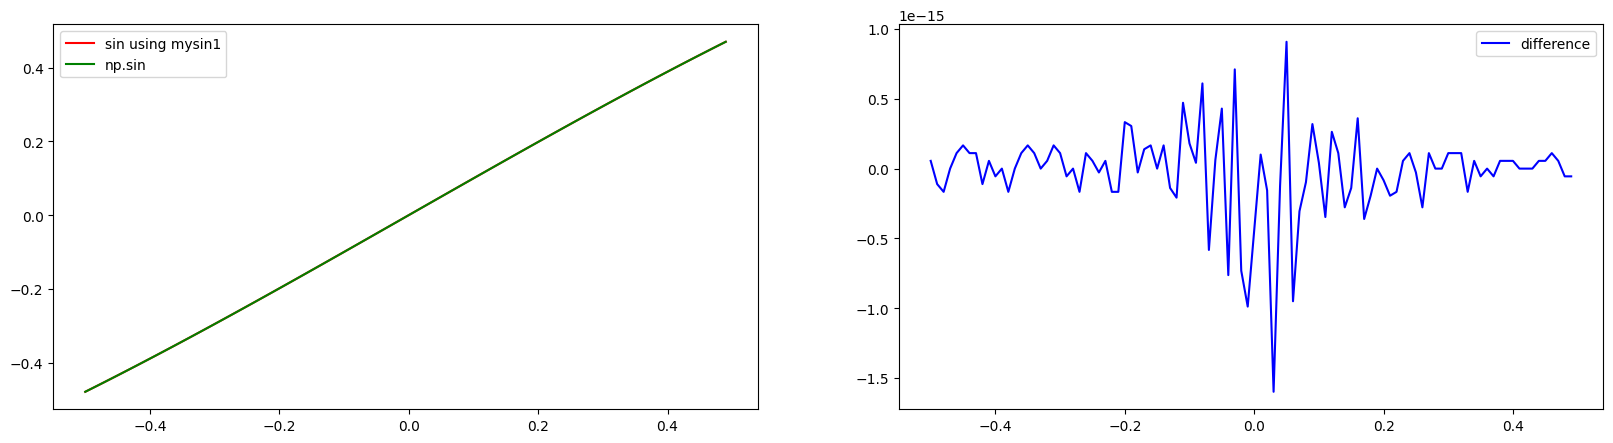

In [6]:
# Will there be errors in approximations near a particular value of x? If yes, compute and display the errors
# here. Show the errors for all approximations that you may have used.

# As we found out a huge spike in errors near 0, we will further analyse our function for values near 0.
x_analyse = np.arange(-0.5,0.5,0.01)
y_new = mysin1(x_analyse)
y1_new = np.sin(x_analyse)
d_new = (y_new-y1_new)


fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].plot(x_analyse, y_new, color='r', label='sin using mysin1')
ax[0].plot(x_analyse, y1_new, color='g', label='np.sin')
ax[0].legend()

ax[1].plot(x_analyse, d_new, color='b', label='difference')
ax[1].legend()

plt.show()

6.817463260588852e-16


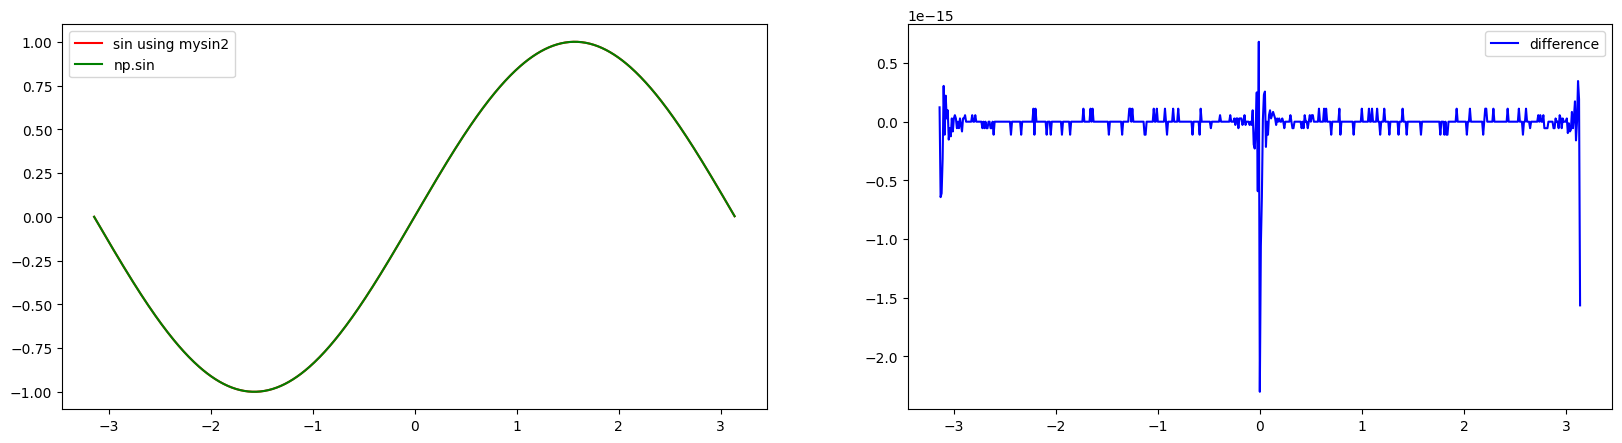

In [6]:
# Implemented mysin2() and plotted the results.
x = np.arange(-np.pi, np.pi, 0.01)
y = mysin2(x)
y1 = np.sin(x)


d = y-y1
print(np.max(d))
x_test = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
y_test = mysin2(x_test)
y1_test = np.sin(x_test)
# print(d)

fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].plot(x, y, color='r', label='sin using mysin2')
ax[0].plot(x, y1, color='g', label='np.sin')
ax[0].legend()

ax[1].plot(x, d, color='b', label='difference')
ax[1].legend()

plt.show()

In [8]:
print(np.pi)

3.141592653589793


## <font color='white'> Ans 2: Write your observations and comments here <font>
The errors in mysin2 function are more than in the mysin1 function. We can observe that the mysin1 function is not able to compute the value of sine correctly at $-\pi$ and $π$ or any of their multiples. This is because *np.pi* takes the value of $\pi$ as $3.141592653589793$ and not the exact value, therefore *np.sin($\pi$)* cannot be computed exactly. But as $cos(\pi)=1$ and $cos(2*\pi)=1$, so the mysin1 and mysin2 function compute the value of $sin$ correctly, i.e. $0$. 

We also observe more errors near $0$, this might be due to the fact that the value of $cos$ is very close to $1$ near $0$ and the value of $sin(x)$ is very close to $x$ near $0$ this might be the reason for the errors near $0$.  

***
### Q.3 Write a function myexpx that computes $exp(x)$ for a given $x \in [0,1]$ using as few terms of the Taylor series as possible in order to obtain an estimate within $10^{−5}$ of the exact value. You should use the same number of terms for any $x \in [0,1]$ , and use `numpy.exp` to compute the absolute and relative errors.

In [7]:
# Write your function to compute an approximation to Exponential of x \in [0,1] 
# using Taylor series approximation below
def myexptaylor(x):
    err = 0
    itr = 0 
    while (abs(x**itr/math.factorial(itr))>(1e-5)):
        err = err + (x**itr)/math.factorial(itr)
        itr = itr + 1
    return err    

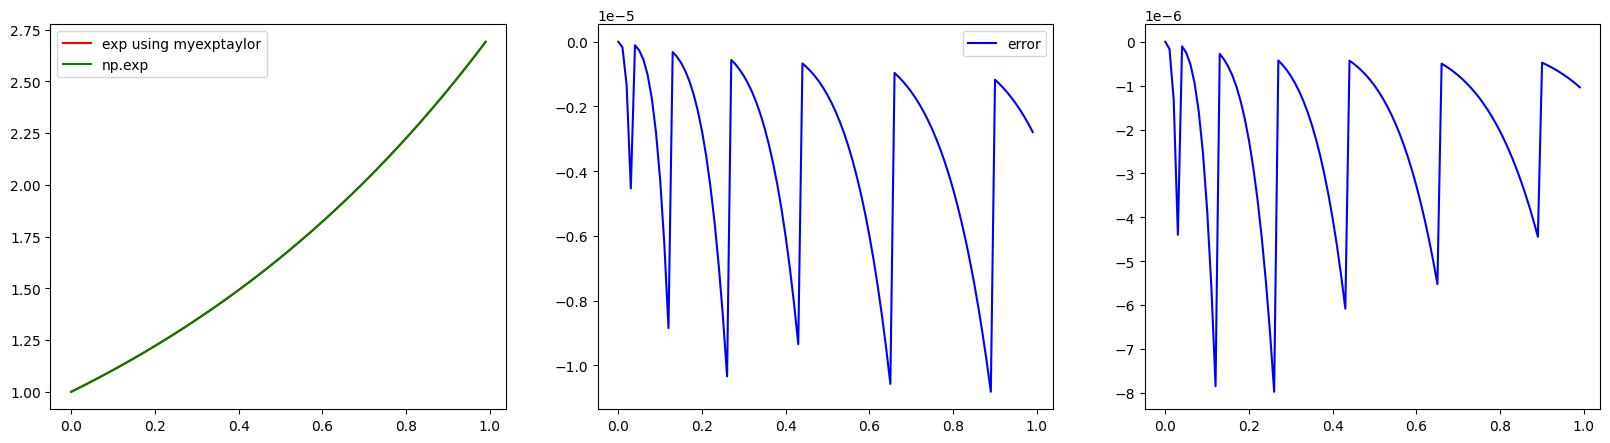

In [8]:
# Run a few examples here, and compute and display errors
x = np.arange(0, 1, 0.01)
y = np.zeros(len(x))
y1 = np.zeros(len(x))
for i in range(len(x)):
    y[i] = myexptaylor(x[i]) # Using myexptaylor exp(x) is approximated
    y1[i] = np.exp(x[i]) # Using numpy exp(x) is calculated

abs_err = (y-y1)
rela_err = abs_err/y1
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].plot(x, y, color='r', label='exp using myexptaylor')
ax[0].plot(x, y1, color='g', label='np.exp')
ax[0].legend()

ax[1].plot(x, abs_err, color='b', label='error')
ax[2].plot(x, rela_err, color='b', label='relative error')
ax[1].legend()

plt.show()

## <font color='white'> Ans 3: Write your observations and comments here <font>
Here we observe that for some values of x the relative error is very high, this is because the value of $np.exp(x)=1$ near $0$ but the value of *myexptaylor(x)* is approximated using the taylor series which can take the value of $1+x$ approximately near $0$. This could be the reason for the high error near $0$. 

***
### Q.4 Write a function mysquareroot that takes in a non-negative number $p$ and an absolute error threshold $\epsilon$, and outputs an estimate of $\sqrt{p}$ within an error $\epsilon$ using the Bisection method. Your function should include the computation of the number of required iterations and that of the initial range $[a_0,b_0]$ that includes $p$ (of course without explicitly computing $\sqrt{p}$). The initial range $[a_0,b_0]$ need not be small, but should satisfy the assumption of the Bisection method. Plot the absolute and relative error for all iterations as well, and plot the ratio $\frac{|c_{n+1} − \sqrt{p}|}{|c_n − \sqrt{p}|}$ against n.

## <font color='white'> Ans 4: Explain how do you set the initial range here  <font>
For finding the root of a non-negative number p we will find the root of the funtion $f(x) = x^2 - p$, root of $f(x)$ will give us the approximate value of $\sqrt p$. We will use the bisection method to find the root of $f(x)$.
Hence we took $a_0 = 0 $ and $b_0 = p$ so $f(a_0)f(b_0) < 0$.
    
    
    

In [3]:
# Write your Bisection method function below. You should return both the final estimate of the root as well as 
# all intermediate estimates.
#def mybisection(p,eps):


def f(x, p):
    return x**2-p
def mysquareroot(p, eps) :
    a = 0
    b = p
    if (f(a, p)*f(b, p) > 0):
        print('Give correct initial values')
        return
    n = 0
    while(n <= math.floor(np.log2(p - 0) - np.log2(eps)) + 1):
        c = (a+b)/2
        if (f(a, p)*f(c, p) < 0) :
          b = c
        elif (f(a, p)*f(c, p) > 0) :
          a = c
        else : 
          print('hi')
          break
        print(c)
        n+=1
print(mysquareroot(25, math.pow(10, -10)))
             
 

12.5
6.25
3.125
4.6875
5.46875
5.078125
4.8828125
4.98046875
5.029296875
5.0048828125
4.99267578125
4.998779296875
5.0018310546875
5.00030517578125
4.999542236328125
4.9999237060546875
5.000114440917969
5.000019073486328
4.999971389770508
4.999995231628418
5.000007152557373
5.0000011920928955
4.999998211860657
4.999999701976776
5.000000447034836
5.000000074505806
4.999999888241291
4.9999999813735485
5.000000027939677
5.000000004656613
4.999999993015081
4.999999998835847
5.00000000174623
5.000000000291038
4.9999999995634425
4.99999999992724
5.000000000109139
5.00000000001819
4.999999999972715
None


In [10]:
# Perform error computations, and computations required for convergence analysis for a few examples here

cnArray = []
abserrArray =[]
relerrArray= []
ratioArray= []
def f(x, p):
    return x**2-p
def mysquareroot(p, eps, root) :
    global cnArray
    global abserrArray
    global relerrArray 
    global ratioArray
    a = 0
    b = p
    if (f(a, p)*f(b, p) > 0):
        print('Give correct initial values')
        return
    n = 0
    c_n1 = 0

    
    while(n <= math.floor(np.log2(p - 0) - np.log2(eps)) + 1):
        c_n = (a+b)/2
        cnArray = np.append(cnArray, abs(n))
        abserr = abs(c_n - root)
        print(c_n, c_n1, abserr)
        # print(abserr)
        abserrArray = np.append(abserrArray, abserr)
        relerr = abs(c_n - root)/root
        relerrArray = np.append(relerrArray, relerr)
        ratio = abs(c_n - root)/abs(c_n1 - root)
        ratioArray = np.append(ratioArray, ratio)
        
        
        if (f(a, p)*f(c_n, p) < 0) :
          b = c_n
        elif (f(a, p)*f(c_n, p) > 0) :
          a = c_n
        else : 
          # print('hi')
          break
        c_n1 = c_n
        # print(ratio ," ", c_n)
        n+=1

print(mysquareroot(25, math.pow(10,-9), math.sqrt(25)))


12.5 0 7.5
6.25 12.5 1.25
3.125 6.25 1.875
4.6875 3.125 0.3125
5.46875 4.6875 0.46875
5.078125 5.46875 0.078125
4.8828125 5.078125 0.1171875
4.98046875 4.8828125 0.01953125
5.029296875 4.98046875 0.029296875
5.0048828125 5.029296875 0.0048828125
4.99267578125 5.0048828125 0.00732421875
4.998779296875 4.99267578125 0.001220703125
5.0018310546875 4.998779296875 0.0018310546875
5.00030517578125 5.0018310546875 0.00030517578125
4.999542236328125 5.00030517578125 0.000457763671875
4.9999237060546875 4.999542236328125 7.62939453125e-05
5.000114440917969 4.9999237060546875 0.00011444091796875
5.000019073486328 5.000114440917969 1.9073486328125e-05
4.999971389770508 5.000019073486328 2.86102294921875e-05
4.999995231628418 4.999971389770508 4.76837158203125e-06
5.000007152557373 4.999995231628418 7.152557373046875e-06
5.0000011920928955 5.000007152557373 1.1920928955078125e-06
4.999998211860657 5.0000011920928955 1.7881393432617188e-06
4.999999701976776 4.999998211860657 2.980232238769531e-07
5

Text(0.5, 1.0, 'ratio')

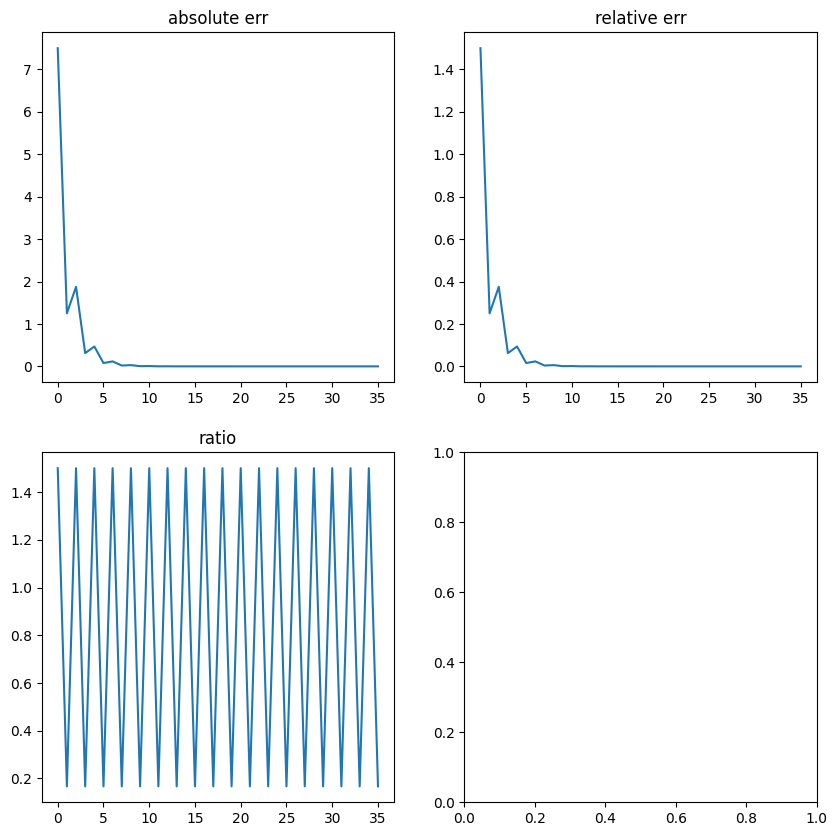

In [11]:
figure, axis = plt.subplots(2, 2, figsize = (10,10))
  
# For Absolute Error
axis[0, 0].plot(cnArray, abserrArray)
axis[0, 0].set_title("absolute err")
  
# For Relative Error
axis[0, 1].plot(cnArray, relerrArray)
axis[0, 1].set_title("relative err")
  
# for ratio
axis[1, 0].plot(cnArray, ratioArray)
axis[1, 0].set_title("ratio")

## <font color='white'> Ans 4: Record your observations, and add your comments here  <font>
In the case of absolute error, we will decrease since we at each iteration we are getting closer to the root, after some number of iteration the value of $c_n$ falls in the neighbourhood of original root sometimes $c_n$ less than root sometimes $c_n$ greater than root and converges to the root  and the absolute error decreases.
    
    
    
    

In [30]:
def mybisection(f, a, b, eps, r):
    abs = np.array([])
    
    if (f(a) * f(b) > 0):
        print('Give corrrect a and b')
        return
    n = 0
    while(n <= math.floor(np.log2(b - a) - np.log2(eps)) + 1):
        c_n = (a+b)/2
        # print(c_n)

        if (f(a)*f(c_n) < 0) :
          b = c_n
        elif (f(a)*f(c_n) > 0) :
          a = c_n
        else : 
          break
        
        aberr = np.abs(r - c_n)
        abs = np.append(abs, aberr)
        
        n+=1
    return c_n, abs, n


4.999999888241291
[7.50000000e+00 1.25000000e+00 1.87500000e+00 3.12500000e-01
 4.68750000e-01 7.81250000e-02 1.17187500e-01 1.95312500e-02
 2.92968750e-02 4.88281250e-03 7.32421875e-03 1.22070312e-03
 1.83105469e-03 3.05175781e-04 4.57763672e-04 7.62939453e-05
 1.14440918e-04 1.90734863e-05 2.86102295e-05 4.76837158e-06
 7.15255737e-06 1.19209290e-06 1.78813934e-06 2.98023224e-07
 4.47034836e-07 7.45058060e-08 1.11758709e-07]


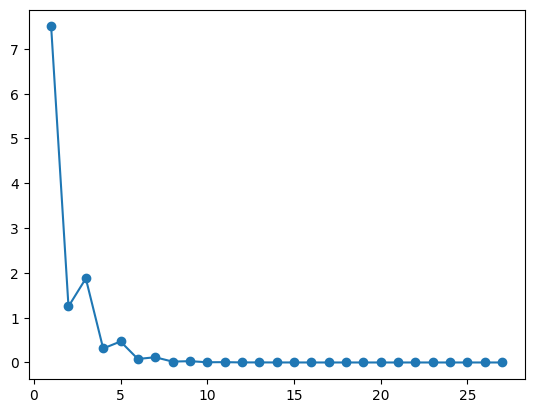

In [44]:
def f(x):
    return x**2 - 25

root, err, n = mybisection(f, 0, 25, 10e-15, 5)
print(root)
print(err)
plt.scatter(np.arange(1, n+1), err)
plt.plot(np.arange(1, n+1), err)
